# Preliminary EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

## Importing subset of COVID-19 case data

In [2]:
!head -5 ./../data/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv

case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
2020-08,KY,21,GRAYSON,21085,0 - 17 years,NA,NA,NA,,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,
2021-01,NC,37,MARTIN,37117,0 - 17 years,NA,NA,NA,0,,Missing,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,
2021-03,VT,50,FRANKLIN,50011,18 to 49 years,NA,NA,NA,0,0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes
2020-09,GA,13,CATOOSA,13047,0 - 17 years,Female,Unknown,Missing,,,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,


In [3]:
path = './../data/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv'
with open(path) as f:
    row_count = sum(1 for row in f)
print(f'Number of records in cases file: {row_count:,}')

Number of records in cases file: 27,145,727


In [4]:
num_records = 5_000_000

In [5]:
df_cases = pd.read_csv(
    './../data/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv',
    nrows=num_records)

In [6]:
df_cases

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-08,KY,21,GRAYSON,21085.0,0 - 17 years,NaN,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
1,2021-01,NC,37,MARTIN,37117.0,0 - 17 years,NaN,NaN,NaN,0.0,NaN,Missing,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,NaN
2,2021-03,VT,50,FRANKLIN,50011.0,18 to 49 years,NaN,NaN,NaN,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes
3,2020-09,GA,13,CATOOSA,13047.0,0 - 17 years,Female,Unknown,Missing,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4,2021-04,PA,42,CLINTON,42035.0,0 - 17 years,Female,NaN,NaN,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,2020-10,MA,25,ESSEX,25009.0,18 to 49 years,Male,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
4999996,2021-04,TN,47,GREENE,47059.0,18 to 49 years,Male,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4999997,2020-11,OH,39,LAKE,39085.0,18 to 49 years,Male,Unknown,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Unknown,NaN
4999998,2020-04,VA,51,VIRGINIA BEACH CITY,51810.0,50 to 64 years,Male,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,NaN,NaN


In [7]:
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 19 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   case_month                       object 
 1   res_state                        object 
 2   state_fips_code                  int64  
 3   res_county                       object 
 4   county_fips_code                 float64
 5   age_group                        object 
 6   sex                              object 
 7   race                             object 
 8   ethnicity                        object 
 9   case_positive_specimen_interval  float64
 10  case_onset_interval              float64
 11  process                          object 
 12  exposure_yn                      object 
 13  current_status                   object 
 14  symptom_status                   object 
 15  hosp_yn                          object 
 16  icu_yn                           object 
 17  death_yn

In [8]:
df_cases.columns

Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity',
       'case_positive_specimen_interval', 'case_onset_interval', 'process',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn', 'underlying_conditions_yn'],
      dtype='object')

In [9]:
# data_types = {'case_month': 'string', 'res_state': 'string', 
#     'state_fips_code': 'string', 'res_county': 'string', 
#     'county_fips_code': 'string', 'age_group': 'string', 'sex': 'string', 
#     'race': 'string', 'ethnicity': 'Int16', 
#     'case_positive_specimen_interval': 'Int16', 
#     'case_onset_interval': 'string', 'process': 'string', 
#     'exposure_yn': 'string', 'current_status': 'string', 
#     'symptom_status': 'string', 'hosp_yn': 'string', 'icu_yn': 'string', 
#     'death_yn': 'string', 'underlying_conditions_yn': 'string',}

In [10]:
df_cases = pd.read_csv(
    './../data/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv',
    dtype='string',
    nrows=num_records)

In [11]:
df_cases = df_cases.drop(columns=['state_fips_code'])

In [12]:
df_cases['case_positive_specimen_interval'] = pd.to_numeric(
    df_cases['case_positive_specimen_interval'])
df_cases['case_onset_interval'] = pd.to_numeric(
    df_cases['case_onset_interval'])

In [13]:
df_cases

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-08,KY,GRAYSON,21085,0 - 17 years,<NA>,<NA>,<NA>,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>
1,2021-01,NC,MARTIN,37117,0 - 17 years,<NA>,<NA>,<NA>,0.0,NaN,Missing,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,<NA>
2,2021-03,VT,FRANKLIN,50011,18 to 49 years,<NA>,<NA>,<NA>,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes
3,2020-09,GA,CATOOSA,13047,0 - 17 years,Female,Unknown,Missing,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>
4,2021-04,PA,CLINTON,42035,0 - 17 years,Female,<NA>,<NA>,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,No,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,2020-10,MA,ESSEX,25009,18 to 49 years,Male,<NA>,<NA>,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,<NA>
4999996,2021-04,TN,GREENE,47059,18 to 49 years,Male,<NA>,<NA>,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>
4999997,2020-11,OH,LAKE,39085,18 to 49 years,Male,Unknown,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Unknown,<NA>
4999998,2020-04,VA,VIRGINIA BEACH CITY,51810,50 to 64 years,Male,<NA>,<NA>,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,<NA>,<NA>


In [14]:
df_cases.describe()

,case_positive_specimen_interval,case_onset_interval
count,1.417794e+06,2.510036e+06
mean,2.651753e-01,1.078809e-01
std,1.897693e+00,1.619478e+00
min,-6.100000e+01,-5.100000e+01
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,5.800000e+01,6.400000e+01


In [15]:
reported_states = sorted(df_cases['res_state'].unique())
reported_states[:4]

['AK', 'AL', 'AR', 'AZ']

In [16]:
all_states = ['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'VI', 'WA', 'WV', 'WI', 'WY']

In [17]:
for state in all_states:
    if state not in reported_states:
        print(state)

AS
DC
GU
MP
PR
VI
WY


Wyoming is not showing up in the subset of data. Does this extend to the full dataset?

In [18]:
df_cases

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-08,KY,GRAYSON,21085,0 - 17 years,<NA>,<NA>,<NA>,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>
1,2021-01,NC,MARTIN,37117,0 - 17 years,<NA>,<NA>,<NA>,0.0,NaN,Missing,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,<NA>
2,2021-03,VT,FRANKLIN,50011,18 to 49 years,<NA>,<NA>,<NA>,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes
3,2020-09,GA,CATOOSA,13047,0 - 17 years,Female,Unknown,Missing,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>
4,2021-04,PA,CLINTON,42035,0 - 17 years,Female,<NA>,<NA>,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,No,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,2020-10,MA,ESSEX,25009,18 to 49 years,Male,<NA>,<NA>,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,<NA>
4999996,2021-04,TN,GREENE,47059,18 to 49 years,Male,<NA>,<NA>,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>
4999997,2020-11,OH,LAKE,39085,18 to 49 years,Male,Unknown,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Unknown,<NA>
4999998,2020-04,VA,VIRGINIA BEACH CITY,51810,50 to 64 years,Male,<NA>,<NA>,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,<NA>,<NA>


In [19]:
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   case_month                       string 
 1   res_state                        string 
 2   res_county                       string 
 3   county_fips_code                 string 
 4   age_group                        string 
 5   sex                              string 
 6   race                             string 
 7   ethnicity                        string 
 8   case_positive_specimen_interval  float64
 9   case_onset_interval              float64
 10  process                          string 
 11  exposure_yn                      string 
 12  current_status                   string 
 13  symptom_status                   string 
 14  hosp_yn                          string 
 15  icu_yn                           string 
 16  death_yn                         string 
 17  underlyi

Cases missing county information

In [20]:
df_cases[df_cases['res_county'].isna()]

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
259,2020-11,AZ,<NA>,<NA>,18 to 49 years,Female,Missing,Hispanic/Latino,NaN,NaN,Missing,Missing,Probable Case,Missing,Yes,Missing,<NA>,<NA>
673,2020-04,GA,<NA>,<NA>,65+ years,Female,Black,Missing,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,<NA>
1781,2020-11,AZ,<NA>,<NA>,18 to 49 years,Female,Missing,Hispanic/Latino,NaN,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,<NA>,<NA>
2294,2020-10,IL,<NA>,<NA>,18 to 49 years,Male,Missing,Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>
3316,2020-11,AZ,<NA>,<NA>,18 to 49 years,Female,Missing,Hispanic/Latino,NaN,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996043,2020-12,GA,<NA>,<NA>,18 to 49 years,Female,Unknown,Missing,NaN,0.0,Missing,Missing,Probable Case,Symptomatic,Missing,Missing,Missing,<NA>
4996657,2020-10,IL,<NA>,<NA>,50 to 64 years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,Missing,<NA>
4998014,2020-12,GA,<NA>,<NA>,18 to 49 years,Female,Unknown,Missing,NaN,0.0,Missing,Missing,Probable Case,Symptomatic,Missing,Missing,Missing,<NA>
4998636,2020-10,IL,<NA>,<NA>,50 to 64 years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,Missing,<NA>


## Importing community crosswalk by census track

In [21]:
df_counties = pd.read_csv(
    './../data/COVID-19_Community_Vulnerability_Crosswalk_-_Crosswalk_by_Census_Tract.csv')

In [22]:
df_counties.head(2)

,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,County FIPS,LOCATION,Total Score,Max Possible Score,Hardest Hit Area (HHA),HHA Score,Low Income Area (LIA) County SAIPE - (Poverty Percentage),Low Income Area (LIA) County SAIPE- Score,Low Income Area (LIA) Census Tract (Poverty Percentage),Low Income Area (LIA) Census Tract - Score,Tribal Community\n(1 if yes),Tribal Community\nScore (Geographic Only),Rural,Rural - Score
0,ALABAMA,AL,1001,Autauga,1001020100,1001,"Census Tract 201, Autauga County, Alabama",7,7,ModerateBurdenResolving,0,0.121,0,0.1666,7,Non-Tribal,0,0,0
1,ALABAMA,AL,1001,Autauga,1001020200,1001,"Census Tract 202, Autauga County, Alabama",7,7,ModerateBurdenResolving,0,0.121,0,0.1913,7,Non-Tribal,0,0,0


In [23]:
df_counties.columns

Index(['STATE', 'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'County FIPS',
       'LOCATION', 'Total Score', 'Max Possible Score',
       'Hardest Hit Area (HHA)', 'HHA Score',
       'Low Income Area (LIA) County SAIPE - (Poverty Percentage)',
       'Low Income Area (LIA) County SAIPE- Score',
       'Low Income Area (LIA) Census Tract (Poverty Percentage)',
       'Low Income Area (LIA) Census Tract - Score',
       'Tribal Community\n(1 if yes)',
       'Tribal Community\nScore (Geographic Only)', 'Rural', 'Rural - Score'],
      dtype='object')

In [24]:
use_columns = ['STATE', 'COUNTY', 'County FIPS', 'Low Income Area (LIA) County SAIPE- Score', 'Tribal Community\n(1 if yes)', 'Rural']

In [25]:
column_names = ['state', 'county', 'county_fips', 'low_income_score', 'tribal', 'rural']

In [26]:
df_counties = pd.read_csv(
    './../data/COVID-19_Community_Vulnerability_Crosswalk_-_Crosswalk_by_Census_Tract.csv',
    usecols=use_columns,
    dtype='string')

In [27]:
df_counties.columns = column_names

In [28]:
df_counties = df_counties.astype({'low_income_score': 'int64', 'rural': 'int64'})

In [29]:
df_counties

,state,county,county_fips,low_income_score,tribal,rural
0,ALABAMA,Autauga,01001,0,Non-Tribal,0
1,ALABAMA,Autauga,01001,0,Non-Tribal,0
2,ALABAMA,Autauga,01001,0,Non-Tribal,0
3,ALABAMA,Autauga,01001,0,Non-Tribal,0
4,ALABAMA,Autauga,01001,0,Non-Tribal,0
...,...,...,...,...,...,...
72831,WYOMING,Washakie,56043,0,Non-Tribal,1
72832,WYOMING,Washakie,56043,0,Non-Tribal,1
72833,WYOMING,Washakie,56043,0,Non-Tribal,1
72834,WYOMING,Weston,56045,0,Non-Tribal,1


In [30]:
df_counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72836 entries, 0 to 72835
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             72836 non-null  string
 1   county            72836 non-null  string
 2   county_fips       72836 non-null  string
 3   low_income_score  72836 non-null  int64 
 4   tribal            72836 non-null  string
 5   rural             72836 non-null  int64 
dtypes: int64(2), string(4)
memory usage: 3.3 MB


In [31]:
df_counties['tribal'] = np.where(df_counties['tribal'] == 'Non-Tribal', 0, 1)
df_counties['ctract_count'] = 1

In [32]:
df_counties

,state,county,county_fips,low_income_score,tribal,rural,ctract_count
0,ALABAMA,Autauga,01001,0,0,0,1
1,ALABAMA,Autauga,01001,0,0,0,1
2,ALABAMA,Autauga,01001,0,0,0,1
3,ALABAMA,Autauga,01001,0,0,0,1
4,ALABAMA,Autauga,01001,0,0,0,1
...,...,...,...,...,...,...,...
72831,WYOMING,Washakie,56043,0,0,1,1
72832,WYOMING,Washakie,56043,0,0,1,1
72833,WYOMING,Washakie,56043,0,0,1,1
72834,WYOMING,Weston,56045,0,0,1,1


In [33]:
df_counties = df_counties.groupby(['state', 'county', 'county_fips']).agg(
    {'low_income_score': 'mean', 'tribal': 'sum', 'rural': 'sum', 'ctract_count': 'sum'}).reset_index()

In [34]:
df_counties['perc_tribal_ct'] = df_counties['tribal'] / df_counties['ctract_count']
df_counties['perc_rural_ct'] = df_counties['rural'] / df_counties['ctract_count']

In [35]:
# df_counties = df_counties.drop(columns=['tribal', 'rural', 'ctract_count'])
df_counties = df_counties.drop(columns=['state', 'county', 'tribal', 'rural', 'ctract_count'])

In [36]:
df_counties

,county_fips,low_income_score,perc_tribal_ct,perc_rural_ct
0,01001,0,0.0,0.250000
1,01003,0,0.0,0.290323
2,01005,15,0.0,1.000000
3,01007,15,0.0,1.000000
4,01009,7,0.0,0.888889
...,...,...,...,...
3136,56037,0,0.0,0.250000
3137,56039,0,0.0,1.000000
3138,56041,0,0.0,1.000000
3139,56043,0,0.0,1.000000


## Joining datasets

In [37]:
df = df_cases.merge(
    df_counties, how='left', left_on='county_fips_code', right_on='county_fips')

In [38]:
df = df.drop(columns=['county_fips'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000000 entries, 0 to 4999999
Data columns (total 21 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   case_month                       string 
 1   res_state                        string 
 2   res_county                       string 
 3   county_fips_code                 object 
 4   age_group                        string 
 5   sex                              string 
 6   race                             string 
 7   ethnicity                        string 
 8   case_positive_specimen_interval  float64
 9   case_onset_interval              float64
 10  process                          string 
 11  exposure_yn                      string 
 12  current_status                   string 
 13  symptom_status                   string 
 14  hosp_yn                          string 
 15  icu_yn                           string 
 16  death_yn                         string 
 17  underlyi

In [40]:
df

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,...,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,low_income_score,perc_tribal_ct,perc_rural_ct
0,2020-08,KY,GRAYSON,21085,0 - 17 years,<NA>,<NA>,<NA>,NaN,0.0,...,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>,15.0,0.0,1.000000
1,2021-01,NC,MARTIN,37117,0 - 17 years,<NA>,<NA>,<NA>,0.0,NaN,...,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,<NA>,15.0,0.0,1.000000
2,2021-03,VT,FRANKLIN,50011,18 to 49 years,<NA>,<NA>,<NA>,0.0,0.0,...,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes,0.0,0.0,1.000000
3,2020-09,GA,CATOOSA,13047,0 - 17 years,Female,Unknown,Missing,NaN,NaN,...,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>,0.0,0.0,0.090909
4,2021-04,PA,CLINTON,42035,0 - 17 years,Female,<NA>,<NA>,0.0,0.0,...,Yes,Laboratory-confirmed case,Symptomatic,No,No,<NA>,<NA>,7.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,2020-10,MA,ESSEX,25009,18 to 49 years,Male,<NA>,<NA>,NaN,NaN,...,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,<NA>,0.0,0.0,0.000000
4999996,2021-04,TN,GREENE,47059,18 to 49 years,Male,<NA>,<NA>,0.0,NaN,...,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>,7.0,0.0,1.000000
4999997,2020-11,OH,LAKE,39085,18 to 49 years,Male,Unknown,Unknown,NaN,NaN,...,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Unknown,<NA>,0.0,0.0,0.016949
4999998,2020-04,VA,VIRGINIA BEACH CITY,51810,50 to 64 years,Male,<NA>,<NA>,NaN,0.0,...,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,<NA>,<NA>,0.0,0.0,0.000000


In [41]:
df['res_county'] = df['res_county'] + ', ' + df['res_state']

In [42]:
# df.to_csv('./../data/temp.csv', index=False)

## Testing chunksize

In [43]:
# with pd.read_csv(path, dtype='string', chunksize=1) as reader:
#     i = 0
#     for chunk in reader:
# #         print(chunk)
#         print(chunk['death_yn'], type(chunk['death_yn']))
#         i += 1
#         if i > 5:
#             break

## EDA - All Cases

Percent NA values (this does not include 'missing' or 'unknown' values)

In [44]:
# (df.isna().sum(axis=0)/len(df)) * 100

In [45]:
# df['res_state'].value_counts(dropna=False)

In [46]:
# fig, ax = plt.subplots(figsize=(10, 6))
# df['res_state'].value_counts(dropna=False).plot(kind='bar', ax=ax)
# ax.set_title('Number of Cases by State');

In [47]:
# fig, ax = plt.subplots(figsize=(10, 6))
# df['res_county'].value_counts(dropna=False)[:50].plot(kind='bar', ax=ax)
# ax.set_title('Top 50 Cases by County');

In [48]:
# fig, ax = plt.subplots(figsize=(10, 6))
# df['age_group'].value_counts(dropna=False, normalize=True).plot(kind='bar', ax=ax)
# ax.set_title('Number of Cases by Age Group');

In [49]:
def plot_quick_bar_chart(df, column, title=None, figsize=(10, 6), normalize=False):
    if not title:
        title = 'Number of Cases by ' + column.title()
    
    fig, ax = plt.subplots(figsize=figsize)
    df[column].value_counts(dropna=False, normalize=normalize).plot(kind='bar', ax=ax)
    ax.set_title(title);

In [50]:
# plot_quick_bar_chart(df, 'sex')

In [51]:
# plot_quick_bar_chart(df, 'race', normalize=True)

In [52]:
# plot_quick_bar_chart(df, 'ethnicity', normalize=True)

In [53]:
# fig, ax = plt.subplots(figsize=(10, 6))
# df['case_positive_specimen_interval'].plot(kind='box', ax=ax)
# ax.set_title('Number of Cases by Case Positive Specimen Interval');

In [54]:
# np.sort(df['case_positive_specimen_interval'].unique())

In [55]:
# fig, ax = plt.subplots(figsize=(10, 6))
# df['case_onset_interval'].plot(kind='box', ax=ax)
# ax.set_title('Number of Cases by Case Onset Interval');

In [56]:
# plot_quick_bar_chart(df, 'process', normalize=True)

In [57]:
# plot_quick_bar_chart(df, 'exposure_yn', normalize=True)

In [58]:
# plot_quick_bar_chart(df, 'current_status')

In [59]:
# plot_quick_bar_chart(df, 'symptom_status', normalize=True)

In [60]:
# plot_quick_bar_chart(df, 'hosp_yn', normalize=True)

In [61]:
# plot_quick_bar_chart(df, 'icu_yn', normalize=True)

In [62]:
# plot_quick_bar_chart(df, 'death_yn', normalize=True)

In [63]:
# pd.plotting.scatter_matrix(df, figsize=(12, 12));

## EDA - Cases with death column completed (yes/no)

In [64]:
df_keep = df[~df['death_yn'].isna()]

In [65]:
df_keep = df_keep[(df_keep['death_yn']=='Yes') | (df_keep['death_yn']=='No')]

In [66]:
df_keep.reset_index(drop=True, inplace=True)

In [67]:
df_keep.head(2)

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,...,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,low_income_score,perc_tribal_ct,perc_rural_ct
0,2020-08,KY,"GRAYSON, KY",21085,0 - 17 years,<NA>,<NA>,<NA>,NaN,0.0,...,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>,15.0,0.0,1.0
1,2021-01,NC,"MARTIN, NC",37117,0 - 17 years,<NA>,<NA>,<NA>,0.0,NaN,...,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,<NA>,15.0,0.0,1.0


In [68]:
df_keep.describe()

,case_positive_specimen_interval,case_onset_interval,low_income_score,perc_tribal_ct,perc_rural_ct
count,782405.000000,1.298315e+06,2.162516e+06,2.162516e+06,2.162516e+06
mean,0.342929,4.146759e-02,4.318455e+00,7.670258e-02,4.714856e-01
std,2.261225,8.419367e-01,5.617427e+00,2.173478e-01,4.143317e-01
min,-61.000000,-5.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,7.692308e-02
50%,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e-01
75%,0.000000,0.000000e+00,7.000000e+00,0.000000e+00,1.000000e+00
max,58.000000,6.100000e+01,1.500000e+01,1.000000e+00,1.000000e+00


In [69]:
df_keep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163313 entries, 0 to 2163312
Data columns (total 21 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   case_month                       string 
 1   res_state                        string 
 2   res_county                       string 
 3   county_fips_code                 object 
 4   age_group                        string 
 5   sex                              string 
 6   race                             string 
 7   ethnicity                        string 
 8   case_positive_specimen_interval  float64
 9   case_onset_interval              float64
 10  process                          string 
 11  exposure_yn                      string 
 12  current_status                   string 
 13  symptom_status                   string 
 14  hosp_yn                          string 
 15  icu_yn                           string 
 16  death_yn                         string 
 17  underlyi

In [70]:
df['res_state'].unique()

<StringArray>
['KY', 'NC', 'VT', 'GA', 'PA', 'OR', 'AR', 'OH', 'OK', 'ME', 'WI', 'SC', 'TN',
 'MS', 'IA', 'MI', 'CO', 'NY', 'MA', 'CA', 'AL', 'MN', 'VA', 'NE', 'IL', 'WA',
 'MT', 'TX', 'MD', 'NH', 'IN', 'FL', 'KS', 'ID', 'RI', 'MO', 'LA', 'NJ', 'DE',
 'UT', 'NM', 'CT', 'AZ', 'ND', 'NV', 'AK', 'SD', 'WV', 'HI']
Length: 49, dtype: string

In [71]:
df['res_county'].unique()

<StringArray>
[   'GRAYSON, KY',     'MARTIN, NC',   'FRANKLIN, VT',    'CATOOSA, GA',
    'CLINTON, PA',   'CRAWFORD, PA',      'CROOK, OR',     'LONOKE, AR',
     'MEDINA, OH',   'MUSKOGEE, OK',
 ...
    'MADISON, AL',    'DAVIESS, KY',     'MARION, IN',   'CHEROKEE, GA',
    'EL PASO, CO',   'FRANKLIN, TN',  'JEFFERSON, KY', 'WASHINGTON, VA',
    'JACKSON, MS',     'MONROE, IN']
Length: 1520, dtype: string

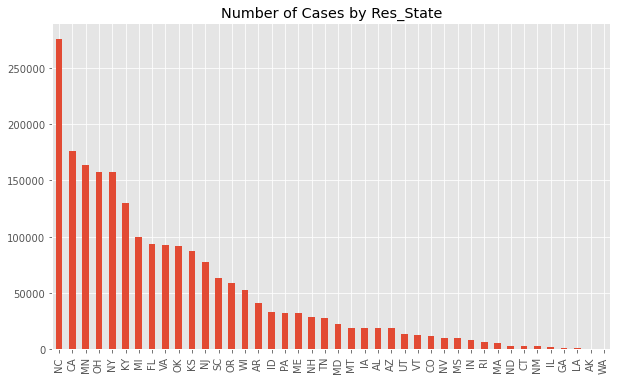

In [72]:
plot_quick_bar_chart(df_keep, 'res_state')

Above will need to be scaled by state's population to be more meaningful

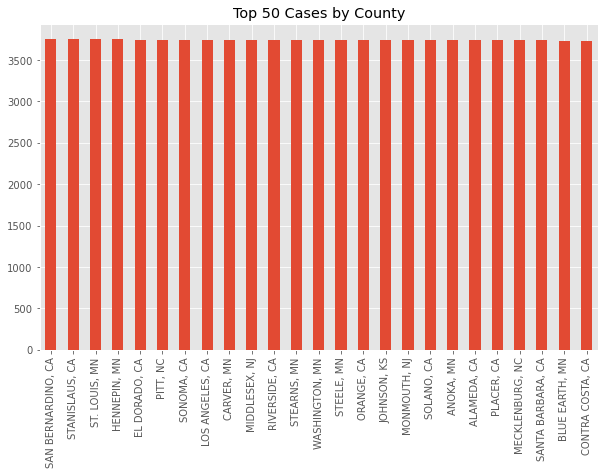

In [73]:
fig, ax = plt.subplots(figsize=(10, 6))
df_keep['res_county'].value_counts(dropna=False)[:25].plot(kind='bar', ax=ax)
ax.set_title('Top 50 Cases by County');

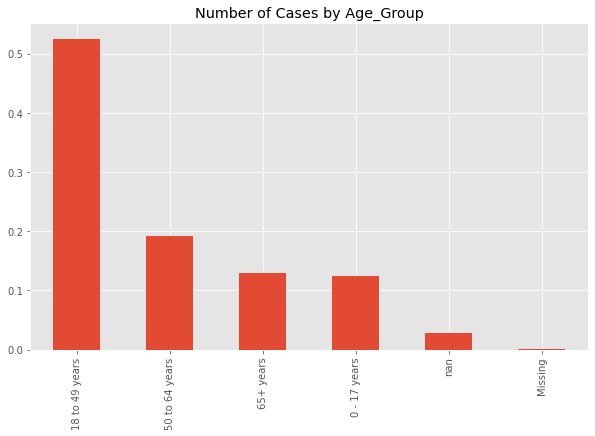

In [74]:
plot_quick_bar_chart(df_keep, 'age_group', normalize=True)

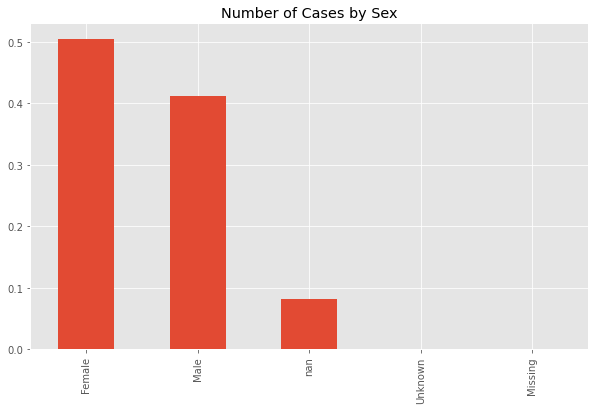

In [75]:
plot_quick_bar_chart(df_keep, 'sex', normalize=True)

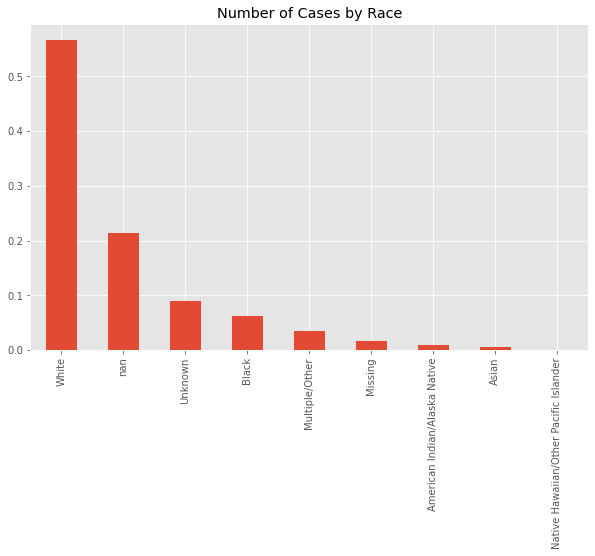

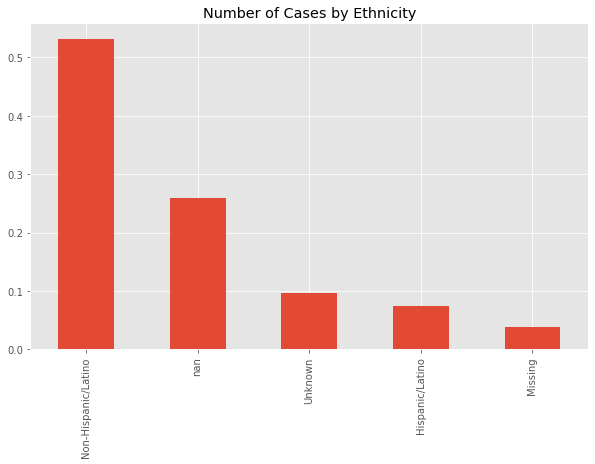

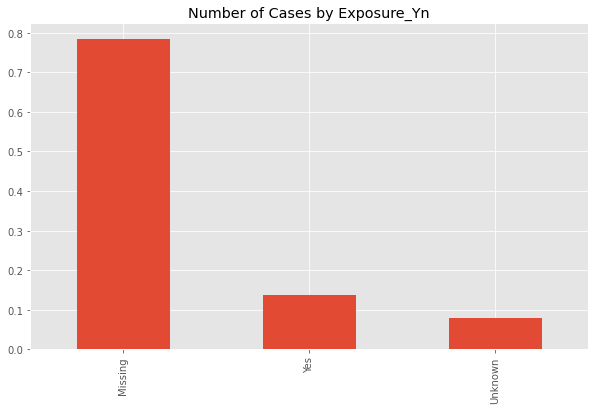

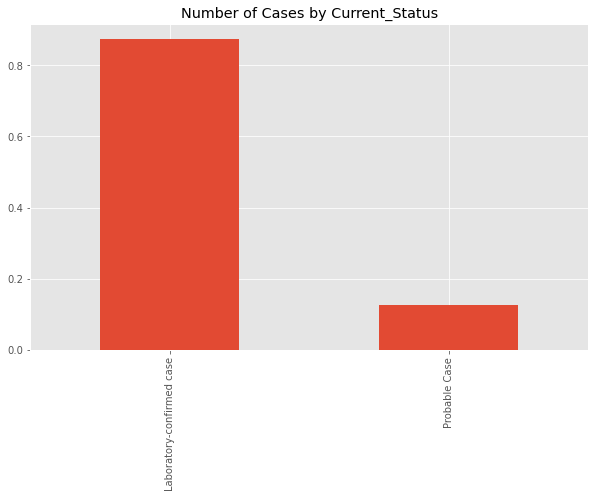

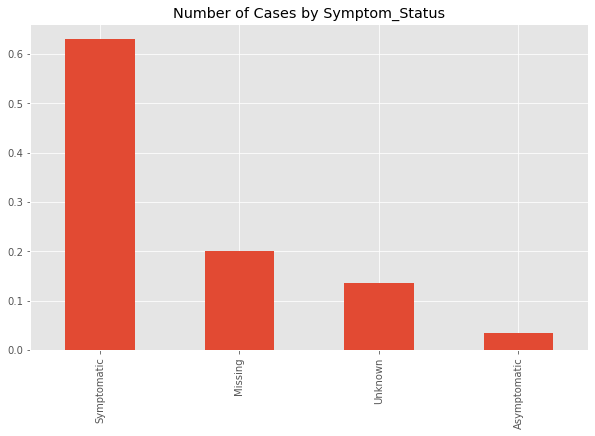

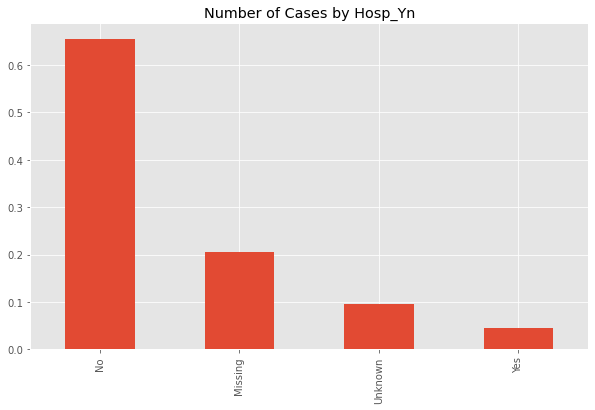

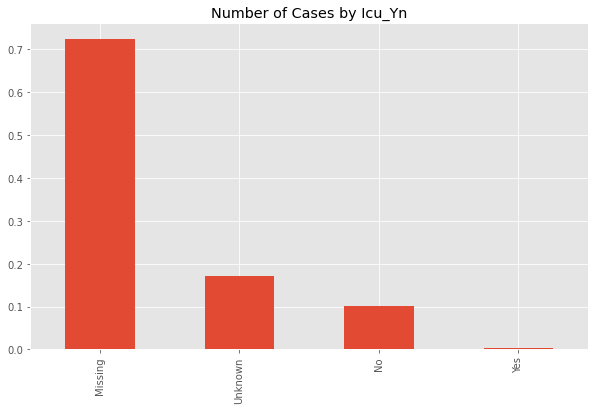

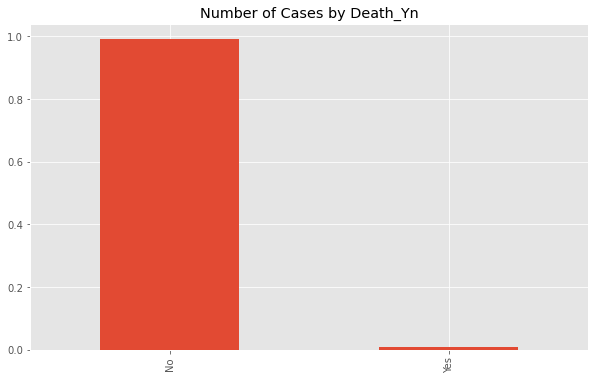

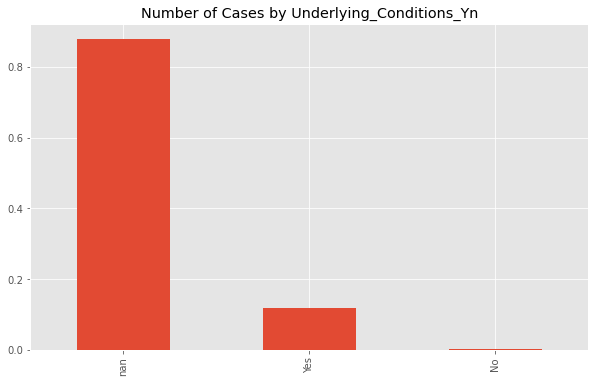

In [76]:
cols = ['race', 'ethnicity', 'exposure_yn', 'current_status', 'symptom_status', 
    'hosp_yn', 'icu_yn', 'death_yn', 'underlying_conditions_yn']
for column in cols:
    plot_quick_bar_chart(df_keep, column, normalize=True)

In [77]:
df_keep['death_yn'].value_counts(dropna=False, normalize=False)

No     2144490
Yes      18823
Name: death_yn, dtype: Int64

Percent NaN for yes/no in death column (d.n. include 'missing' or 'unknown')

In [78]:
df_keep['current_status'].value_counts(normalize=True)

Laboratory-confirmed case    0.87402
Probable Case                0.12598
Name: current_status, dtype: Float64

In [79]:
(df_keep.isna().sum(axis=0)/len(df_keep)) * 100

case_month                          0.000000
res_state                           0.000000
res_county                          0.036842
county_fips_code                    0.036842
age_group                           2.835789
sex                                 8.227104
race                               21.479509
ethnicity                          25.949782
case_positive_specimen_interval    63.833019
case_onset_interval                39.984875
process                             0.000000
exposure_yn                         0.000000
current_status                      0.000000
symptom_status                      0.000000
hosp_yn                             0.000000
icu_yn                              0.000000
death_yn                            0.000000
underlying_conditions_yn           87.798391
low_income_score                    0.036842
perc_tribal_ct                      0.036842
perc_rural_ct                       0.036842
dtype: float64

Percent NaN, Unknown, or Missing by column

In [80]:
(((df_keep == 'Missing') | (df_keep == 'Unknown') | df_keep.isna()).sum(axis=0) / len(df_keep)) * 100

case_month                          0.000000
res_state                           0.000000
res_county                          0.036842
county_fips_code                    0.036842
age_group                           2.870227
sex                                 8.355887
race                               32.054123
ethnicity                          39.461280
case_positive_specimen_interval    63.833019
case_onset_interval                39.984875
process                            91.244402
exposure_yn                        86.381536
current_status                      0.000000
symptom_status                     33.664800
hosp_yn                            29.996676
icu_yn                             89.456958
death_yn                            0.000000
underlying_conditions_yn           87.798391
low_income_score                    0.036842
perc_tribal_ct                      0.036842
perc_rural_ct                       0.036842
dtype: float64

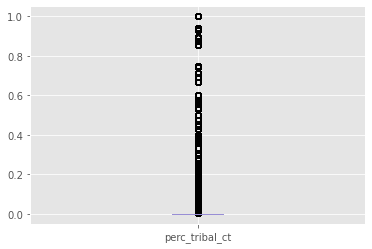

In [81]:
df_keep['perc_tribal_ct'].plot(kind='box');

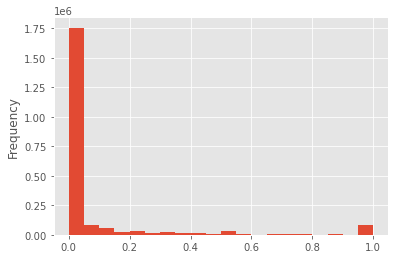

In [82]:
df_keep['perc_tribal_ct'].plot(kind='hist', bins=20);

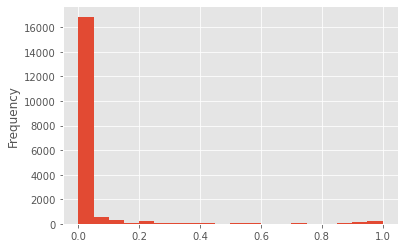

In [83]:
df_keep.loc[df_keep['death_yn']=='Yes', 'perc_tribal_ct'].plot(kind='hist', bins=20);

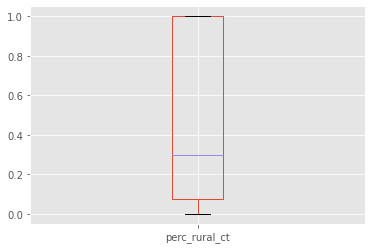

In [84]:
df_keep['perc_rural_ct'].plot(kind='box');

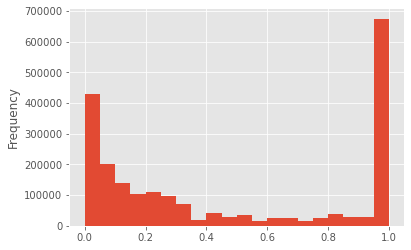

In [85]:
df_keep['perc_rural_ct'].plot(kind='hist', bins=20);

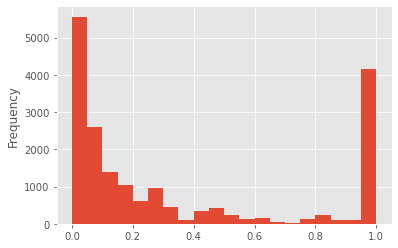

In [86]:
df_keep.loc[df_keep['death_yn']=='Yes', 'perc_rural_ct'].plot(kind='hist', bins=20);

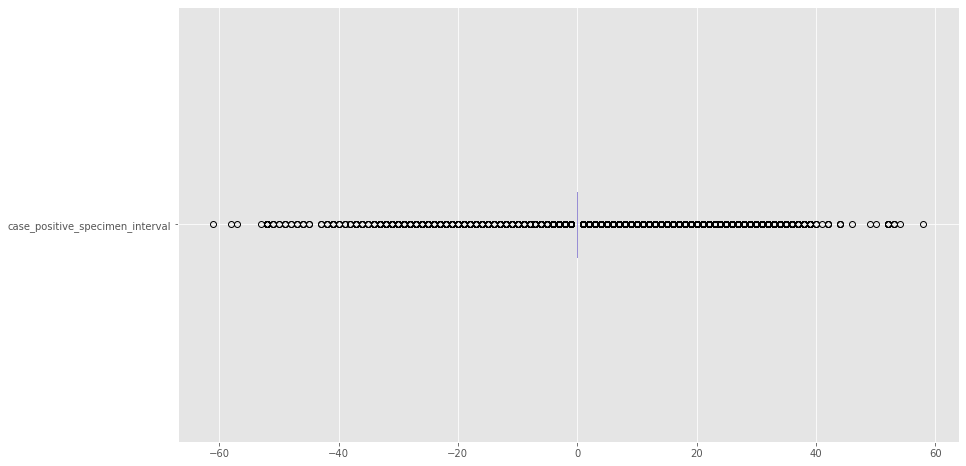

In [117]:
df_keep['case_positive_specimen_interval'].plot(kind='box', vert=False, figsize=(14, 8));

<AxesSubplot:ylabel='Frequency'>

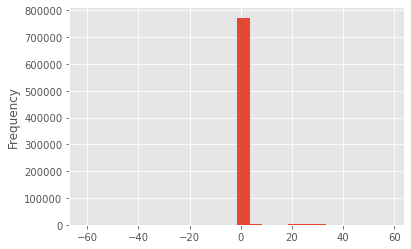

In [88]:
df_keep['case_positive_specimen_interval'].plot(kind='hist', bins=24)

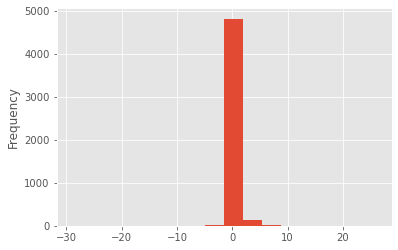

In [89]:
df_keep.loc[df_keep['death_yn']=='Yes', 'case_positive_specimen_interval'].plot(kind='hist', bins=16);

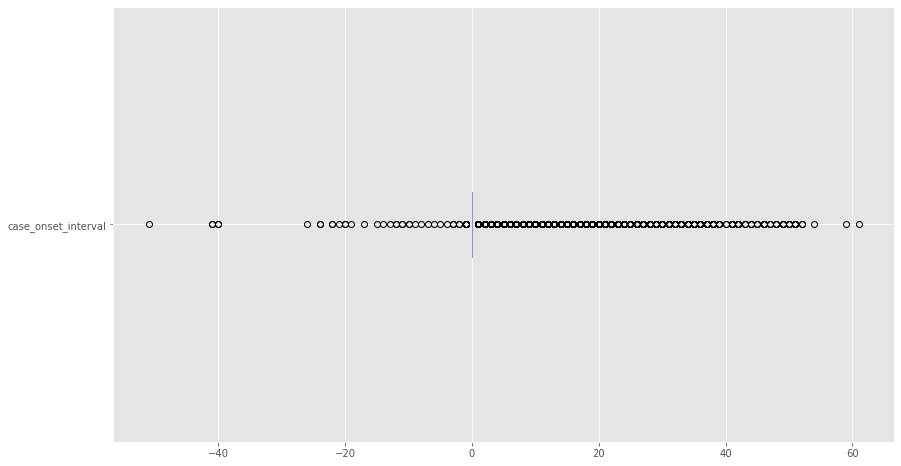

In [118]:
df_keep['case_onset_interval'].plot(kind='box', vert=False, figsize=(14, 8));

In [91]:
df_keep['case_onset_interval'].value_counts()

 0.0     1291211
 1.0        2084
 4.0         625
 3.0         508
 2.0         490
          ...   
-7.0           1
-14.0          1
-5.0           1
 59.0          1
-9.0           1
Name: case_onset_interval, Length: 81, dtype: int64

<AxesSubplot:ylabel='Frequency'>

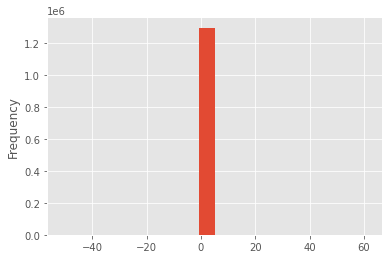

In [92]:
df_keep['case_onset_interval'].plot(kind='hist', bins=20)

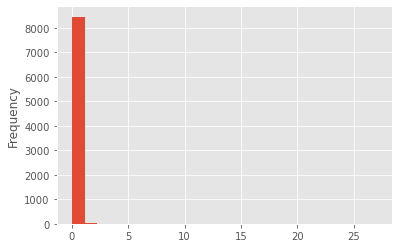

In [93]:
df_keep.loc[df_keep['death_yn']=='Yes', 'case_onset_interval'].plot(kind='hist', bins=24);

In [94]:
df_keep

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,...,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,low_income_score,perc_tribal_ct,perc_rural_ct
0,2020-08,KY,"GRAYSON, KY",21085,0 - 17 years,<NA>,<NA>,<NA>,NaN,0.0,...,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>,15.0,0.0,1.000000
1,2021-01,NC,"MARTIN, NC",37117,0 - 17 years,<NA>,<NA>,<NA>,0.0,NaN,...,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,<NA>,15.0,0.0,1.000000
2,2021-03,VT,"FRANKLIN, VT",50011,18 to 49 years,<NA>,<NA>,<NA>,0.0,0.0,...,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes,0.0,0.0,1.000000
3,2021-04,OR,"CROOK, OR",41013,0 - 17 years,Female,<NA>,<NA>,NaN,0.0,...,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>,0.0,0.0,1.000000
4,2020-07,OK,"MUSKOGEE, OK",40101,0 - 17 years,Female,<NA>,<NA>,NaN,NaN,...,Missing,Laboratory-confirmed case,Unknown,No,Missing,No,<NA>,15.0,1.0,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163308,2021-05,NC,"ONSLOW, NC",37133,18 to 49 years,Male,Multiple/Other,<NA>,0.0,NaN,...,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,<NA>,0.0,0.0,0.218750
2163309,2021-03,NY,"JEFFERSON, NY",36045,<NA>,<NA>,<NA>,<NA>,NaN,NaN,...,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,<NA>,7.0,0.0,0.230769
2163310,2020-06,NY,"MONROE, NY",36055,18 to 49 years,Unknown,Missing,Unknown,19.0,NaN,...,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,<NA>,0.0,0.0,0.052083
2163311,2020-08,NJ,"ESSEX, NJ",34013,18 to 49 years,Female,<NA>,<NA>,NaN,0.0,...,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>,7.0,0.0,0.000000


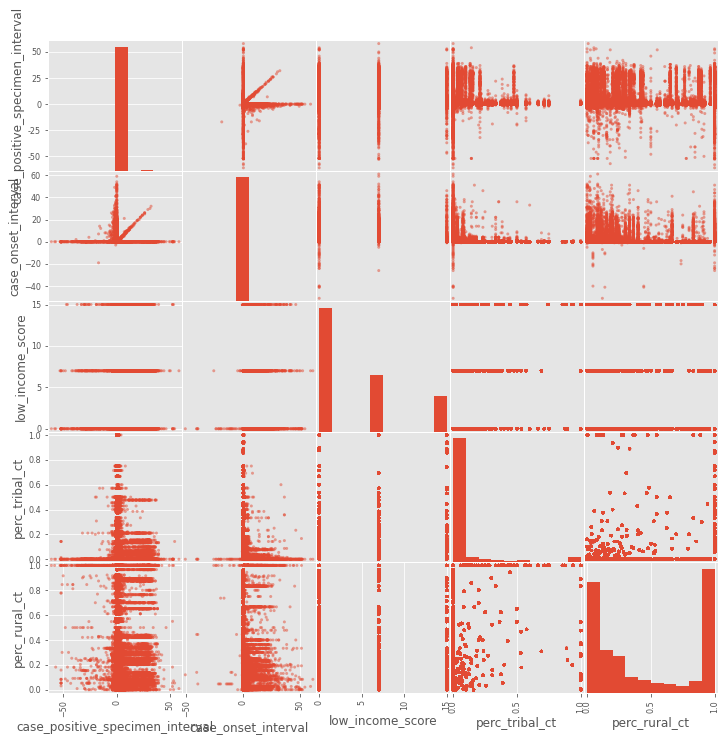

In [95]:
pd.plotting.scatter_matrix(df_keep, figsize=(12, 12));

In [96]:
age_death = df_keep.loc[:, ['age_group', 'death_yn']]
age_death = pd.get_dummies(age_death, columns=['death_yn'])
age_death = age_death.groupby('age_group').sum()
age_death = (age_death.div(age_death.sum(axis=1), axis=0) * 100).round(2)
age_death

,death_yn_No,death_yn_Yes
age_group,,
0 - 17 years,100.00,0.00
18 to 49 years,100.00,0.00
50 to 64 years,99.90,0.10
65+ years,93.43,6.57
Missing,100.00,0.00


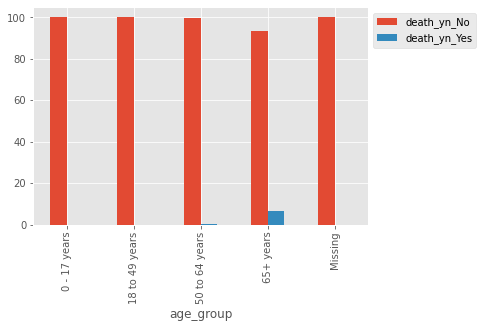

In [97]:
fig, ax = plt.subplots()
age_death.plot(kind='bar', ax=ax, legend=False)
fig.legend(loc='center left', bbox_to_anchor=(0.90, 0.80));

In [98]:
def create_bar_chart_table(df, column):
    table = df.loc[:, [column, 'death_yn']]
    table = pd.get_dummies(table, columns=['death_yn'])
    table = table.groupby(column).sum()
    table = (table.div(table.sum(axis=1), axis=0)*100).round(2)
    return table

In [99]:
def quick_grouped_bar_chart(df):
    fig, ax = plt.subplots()
    df.plot(kind='bar', ax=ax, legend=False)
    fig.legend(loc='center left', bbox_to_anchor=(0.90, 0.80));
    return None

In [100]:
sex_death = create_bar_chart_table(df_keep, 'sex')
sex_death

,death_yn_No,death_yn_Yes
sex,,
Female,99.11,0.89
Male,99.01,0.99
Missing,100.00,0.00
Unknown,100.00,0.00


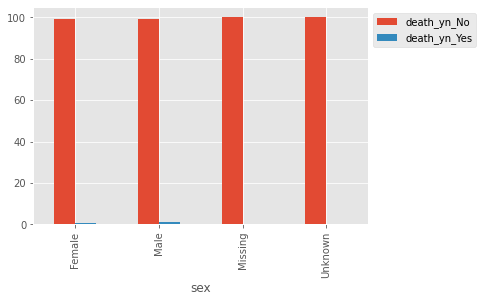

In [101]:
quick_grouped_bar_chart(sex_death)

In [102]:
race_death = create_bar_chart_table(df_keep, 'race')
race_death

,death_yn_No,death_yn_Yes
race,,
American Indian/Alaska Native,98.75,1.25
Asian,100.00,0.00
Black,99.40,0.60
Missing,98.57,1.43
Multiple/Other,99.72,0.28
Native Hawaiian/Other Pacific Islander,100.00,0.00
Unknown,99.78,0.22
White,98.73,1.27


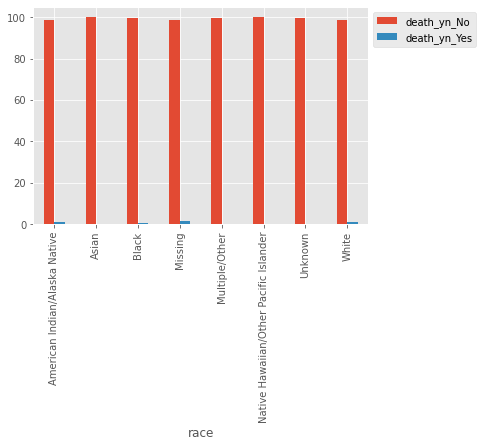

In [103]:
quick_grouped_bar_chart(race_death)

In [104]:
exposure_death = create_bar_chart_table(df_keep, 'exposure_yn')
exposure_death

,death_yn_No,death_yn_Yes
exposure_yn,,
Missing,99.10,0.90
Unknown,99.61,0.39
Yes,99.01,0.99


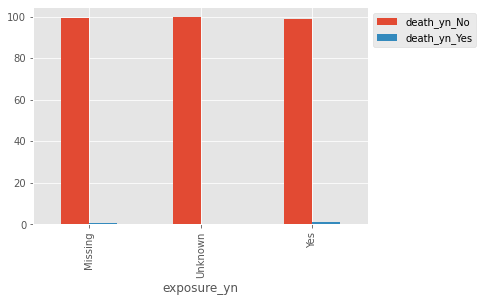

In [105]:
quick_grouped_bar_chart(exposure_death)

In [106]:
hosp_death = create_bar_chart_table(df_keep, 'hosp_yn')
hosp_death

,death_yn_No,death_yn_Yes
hosp_yn,,
Missing,98.89,1.11
No,99.73,0.27
Unknown,99.08,0.92
Yes,91.58,8.42


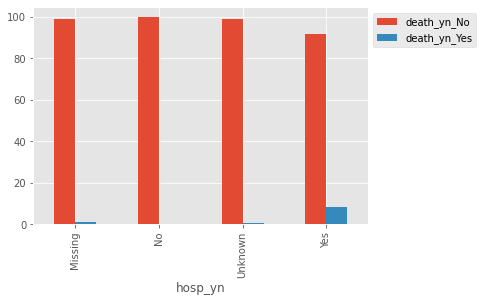

In [107]:
quick_grouped_bar_chart(hosp_death)

In [108]:
icu_death = create_bar_chart_table(df_keep, 'icu_yn')
icu_death

,death_yn_No,death_yn_Yes
icu_yn,,
Missing,99.16,0.84
No,99.29,0.71
Unknown,99.19,0.81
Yes,84.82,15.18


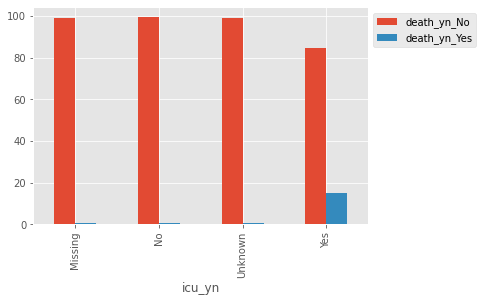

In [109]:
quick_grouped_bar_chart(icu_death)

In [110]:
underlying_death = create_bar_chart_table(df_keep, 'underlying_conditions_yn')
underlying_death

,death_yn_No,death_yn_Yes
underlying_conditions_yn,,
No,100.00,0.00
Yes,98.45,1.55


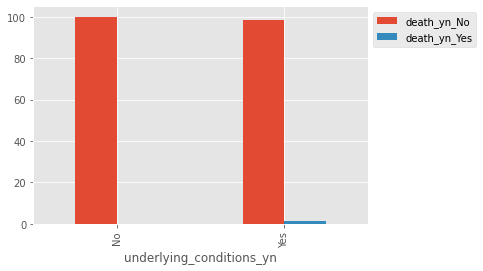

In [111]:
quick_grouped_bar_chart(underlying_death)

In [112]:
low_income_death = create_bar_chart_table(df_keep, 'low_income_score')
low_income_death

,death_yn_No,death_yn_Yes
low_income_score,,
0.0,99.11,0.89
7.0,99.05,0.95
15.0,99.34,0.66


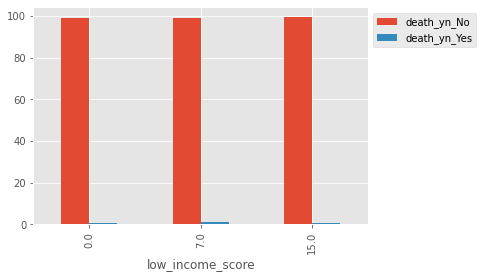

In [113]:
quick_grouped_bar_chart(low_income_death)

In [114]:
df_keep

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,...,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,low_income_score,perc_tribal_ct,perc_rural_ct
0,2020-08,KY,"GRAYSON, KY",21085,0 - 17 years,<NA>,<NA>,<NA>,NaN,0.0,...,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>,15.0,0.0,1.000000
1,2021-01,NC,"MARTIN, NC",37117,0 - 17 years,<NA>,<NA>,<NA>,0.0,NaN,...,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,<NA>,15.0,0.0,1.000000
2,2021-03,VT,"FRANKLIN, VT",50011,18 to 49 years,<NA>,<NA>,<NA>,0.0,0.0,...,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes,0.0,0.0,1.000000
3,2021-04,OR,"CROOK, OR",41013,0 - 17 years,Female,<NA>,<NA>,NaN,0.0,...,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>,0.0,0.0,1.000000
4,2020-07,OK,"MUSKOGEE, OK",40101,0 - 17 years,Female,<NA>,<NA>,NaN,NaN,...,Missing,Laboratory-confirmed case,Unknown,No,Missing,No,<NA>,15.0,1.0,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163308,2021-05,NC,"ONSLOW, NC",37133,18 to 49 years,Male,Multiple/Other,<NA>,0.0,NaN,...,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,<NA>,0.0,0.0,0.218750
2163309,2021-03,NY,"JEFFERSON, NY",36045,<NA>,<NA>,<NA>,<NA>,NaN,NaN,...,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,<NA>,7.0,0.0,0.230769
2163310,2020-06,NY,"MONROE, NY",36055,18 to 49 years,Unknown,Missing,Unknown,19.0,NaN,...,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,<NA>,0.0,0.0,0.052083
2163311,2020-08,NJ,"ESSEX, NJ",34013,18 to 49 years,Female,<NA>,<NA>,NaN,0.0,...,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>,7.0,0.0,0.000000
